In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../data/HousePricePrediction.csv")
df.drop(["Id"], axis=1, inplace=True)
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [3]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [4]:
df.isnull()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,True


In [5]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [6]:
df['SalePrice'] = df["SalePrice"].fillna(df["SalePrice"].mean())

In [7]:
df.isnull()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,False
2915,False,False,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [9]:
df_new = df.dropna()

In [10]:
df_new

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [11]:
df_new.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [13]:
df_new.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [14]:
object_columns = []
for i in df_new.columns:
    print(i)
    if df_new[i].dtype == object:
        object_columns.append(i)

MSSubClass
MSZoning
LotArea
LotConfig
BldgType
OverallCond
YearBuilt
YearRemodAdd
Exterior1st
BsmtFinSF2
TotalBsmtSF
SalePrice


In [15]:
object_columns

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [16]:
for i in object_columns:
    print(df_new[i].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [17]:
label_encoder = preprocessing.LabelEncoder()
for i in object_columns:
    df_new[i] = label_encoder.fit_transform(df_new[i])

C:\Users\udayp\AppData\Local\Temp\ipykernel_28512\2667888406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\udayp\AppData\Local\Temp\ipykernel_28512\2667888406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i] = label_encoder.fit_transform(df_new[i])
C:\Users\udayp\AppData\Local\Temp\ipykernel_28512\2667888406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [18]:
df_new

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.00000
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.00000
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.00000
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.00000
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,1936,4,3,7,1970,1970,5,0.0,546.0,180921.19589
2915,160,4,1894,4,4,5,1970,1970,5,0.0,546.0,180921.19589
2916,20,3,20000,4,0,7,1960,1996,12,0.0,1224.0,180921.19589
2917,85,3,10441,4,0,5,1992,1992,6,0.0,912.0,180921.19589


In [19]:
for i in object_columns:
    print(df_new[i].unique())

[3 4 0 1 2]
[4 2 0 1 3]
[0 1 2 4 3]
[12  8 13  6  3 14  5  9  0 11  2  1 10  7  4]


In [20]:
import torch
df_new_tensor = torch.tensor(df_new.values, dtype=torch.float32)
df_new_tensor[0]

tensor([6.0000e+01, 3.0000e+00, 8.4500e+03, 4.0000e+00, 0.0000e+00, 5.0000e+00,
        2.0030e+03, 2.0030e+03, 1.2000e+01, 0.0000e+00, 8.5600e+02, 2.0850e+05])

In [21]:
X = df_new.iloc[:,:-1]
X

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,1936,4,3,7,1970,1970,5,0.0,546.0
2915,160,4,1894,4,4,5,1970,1970,5,0.0,546.0
2916,20,3,20000,4,0,7,1960,1996,12,0.0,1224.0
2917,85,3,10441,4,0,5,1992,1992,6,0.0,912.0


In [22]:
X = df_new_tensor[:,[0,1,2,3,4,5,6,7,8,9,10]]
X, X.shape

(tensor([[6.0000e+01, 3.0000e+00, 8.4500e+03,  ..., 1.2000e+01, 0.0000e+00,
          8.5600e+02],
         [2.0000e+01, 3.0000e+00, 9.6000e+03,  ..., 8.0000e+00, 0.0000e+00,
          1.2620e+03],
         [6.0000e+01, 3.0000e+00, 1.1250e+04,  ..., 1.2000e+01, 0.0000e+00,
          9.2000e+02],
         ...,
         [2.0000e+01, 3.0000e+00, 2.0000e+04,  ..., 1.2000e+01, 0.0000e+00,
          1.2240e+03],
         [8.5000e+01, 3.0000e+00, 1.0441e+04,  ..., 6.0000e+00, 0.0000e+00,
          9.1200e+02],
         [6.0000e+01, 3.0000e+00, 9.6270e+03,  ..., 6.0000e+00, 0.0000e+00,
          9.9600e+02]]),
 torch.Size([2913, 11]))

In [23]:
y = df_new['SalePrice']
y

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2913, dtype: float64

In [24]:
y = df_new_tensor[:,[11]]
y, y.shape

(tensor([[208500.0000],
         [181500.0000],
         [223500.0000],
         ...,
         [180921.2031],
         [180921.2031],
         [180921.2031]]),
 torch.Size([2913, 1]))

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(2330, 583, 2330, 583)

In [26]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
class housepricev0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 10):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer_3 = nn.Linear(in_features=hidden_units, out_features=output_features)
        self.relu = nn.ReLU()

    def forward(self, x):

        z = self.layer_1(x)
        z = self.relu(z)
        z = self.layer_2(z)
        z = self.relu(z)
        z = self.layer_3(z)

        return z

In [28]:
housepricemodelv0 = housepricev0(input_features=11,
                                 output_features=1
                                 ).to(device)
housepricemodelv0

housepricev0(
  (layer_1): Linear(in_features=11, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [29]:
from torchinfo import summary

summary(housepricemodelv0, input_size = [11])

Layer (type:depth-idx)                   Output Shape              Param #
housepricev0                             [1]                       --
├─Linear: 1-1                            [10]                      120
├─ReLU: 1-2                              [10]                      --
├─Linear: 1-3                            [10]                      110
├─ReLU: 1-4                              [10]                      --
├─Linear: 1-5                            [1]                       11
Total params: 241
Trainable params: 241
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [30]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(housepricemodelv0.parameters(),
                            lr=0.01)

In [31]:
torch.manual_seed(42)

train_losses = []
test_losses = []
epoch_count = []

epochs = 1000

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    epoch_count.append(epoch)

    # training

    housepricemodelv0.train()
    y_pred = housepricemodelv0(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.detach().cpu().numpy())

    # testing

    housepricemodelv0.eval()
    with torch.inference_mode():
        test_pred = housepricemodelv0(x_test)
        test_loss = loss_fn(test_pred, y_test)

        test_losses.append(test_loss.detach().cpu().numpy())

    if epoch%100 == 0:
        print(f"Epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")
    

Epoch: 0 | train loss: 180291.765625 | test loss: 8562102.0
Epoch: 100 | train loss: 180449.296875 | test loss: 182769.34375
Epoch: 200 | train loss: 180404.625 | test loss: 182723.8125
Epoch: 300 | train loss: 180084.9375 | test loss: 182397.703125
Epoch: 400 | train loss: 177752.390625 | test loss: 180018.28125
Epoch: 500 | train loss: 160693.859375 | test loss: 162616.890625
Epoch: 600 | train loss: 52817.49609375 | test loss: 55207.66015625
Epoch: 700 | train loss: 28969.38671875 | test loss: 31566.279296875
Epoch: 800 | train loss: 28969.017578125 | test loss: 31565.921875
Epoch: 900 | train loss: 28973.5859375 | test loss: 31570.484375


In [32]:
housepricemodelv0(torch.tensor([60,3,8450,4,0,5,2003,2003,12,0,856], dtype=torch.float).to(device))

tensor([178815.6094], device='cuda:0', grad_fn=<ViewBackward0>)

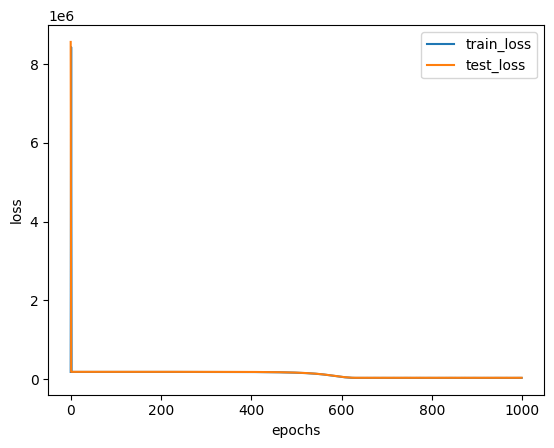

In [33]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_losses, label = 'train_loss')
plt.plot(epoch_count, test_losses, label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()